1. 데이터 로드 및 탐색

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

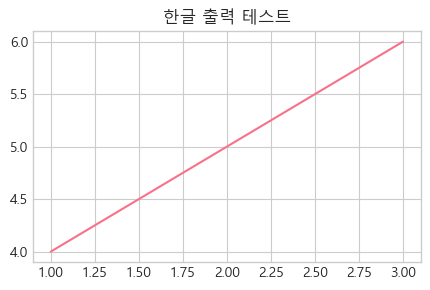

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 폰트 경로 설정 (일반적으로 이 경로에 위치합니다)
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_prop)
plt.rcParams['axes.unicode_minus'] = False

# 테스트
plt.figure(figsize=(5,3))
plt.title('한글 출력 테스트')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [3]:
# 데이터 로드
train = pd.read_csv('C:/Users/User/gitub/sklearn-est15th/Ecom_Shipping/data/Train.csv')


print(f'Train 데이터 크기: {train.shape}')

Train 데이터 크기: (10999, 12)


In [4]:
display(train.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
print(train.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


### 2. 컬럼별 데이터 분석 및 시각화

**컬럼**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 매우 불만족, 5: 매우 만족)
* **Cost of the product**: 제품 가격 (USD 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (단위: g)
* **Reached on time**: 정시 도착 여부 (타겟 변수, 1: 정시 도착 x, 0: 정시 도착)

2-1. 타겟변수(Reahed on time) 분석

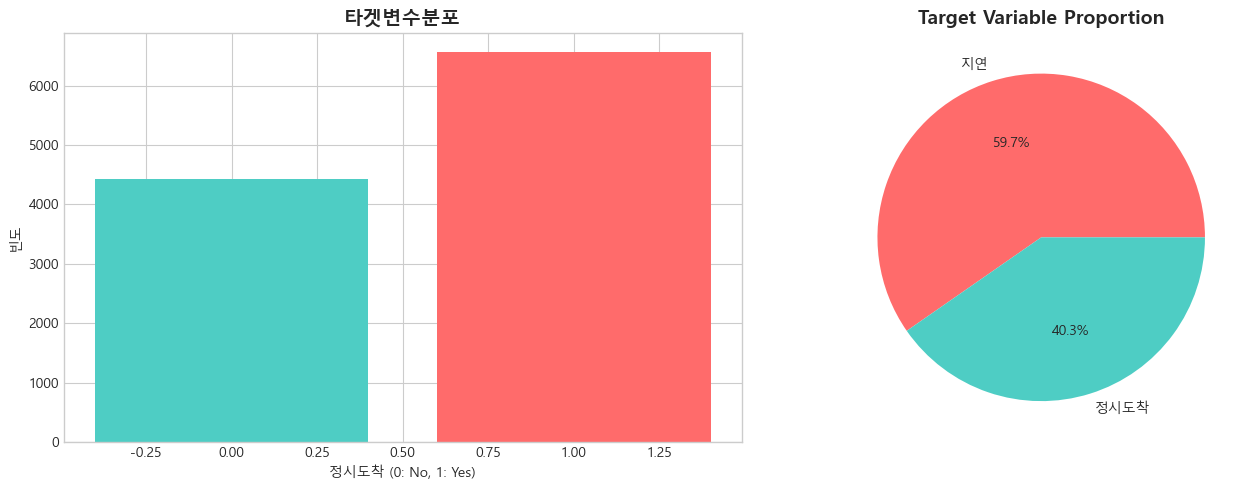


📈 Class Distribution:
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

📊 Class Proportions:
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [15]:
# 타겟변수 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df=train

axes[0].bar(df['Reached.on.Time_Y.N'].value_counts().index, 
           df['Reached.on.Time_Y.N'].value_counts().values,
           color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('타겟변수분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('정시도착 (0: No, 1: Yes)')
axes[0].set_ylabel('빈도')

axes[1].pie(df['Reached.on.Time_Y.N'].value_counts().values, 
           labels=['지연', '정시도착'],
           autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📈 Class Distribution:\n{df['Reached.on.Time_Y.N'].value_counts()}")
print(f"\n📊 Class Proportions:\n{df['Reached.on.Time_Y.N'].value_counts(normalize=True)}")

2-2. 상관관계 분석

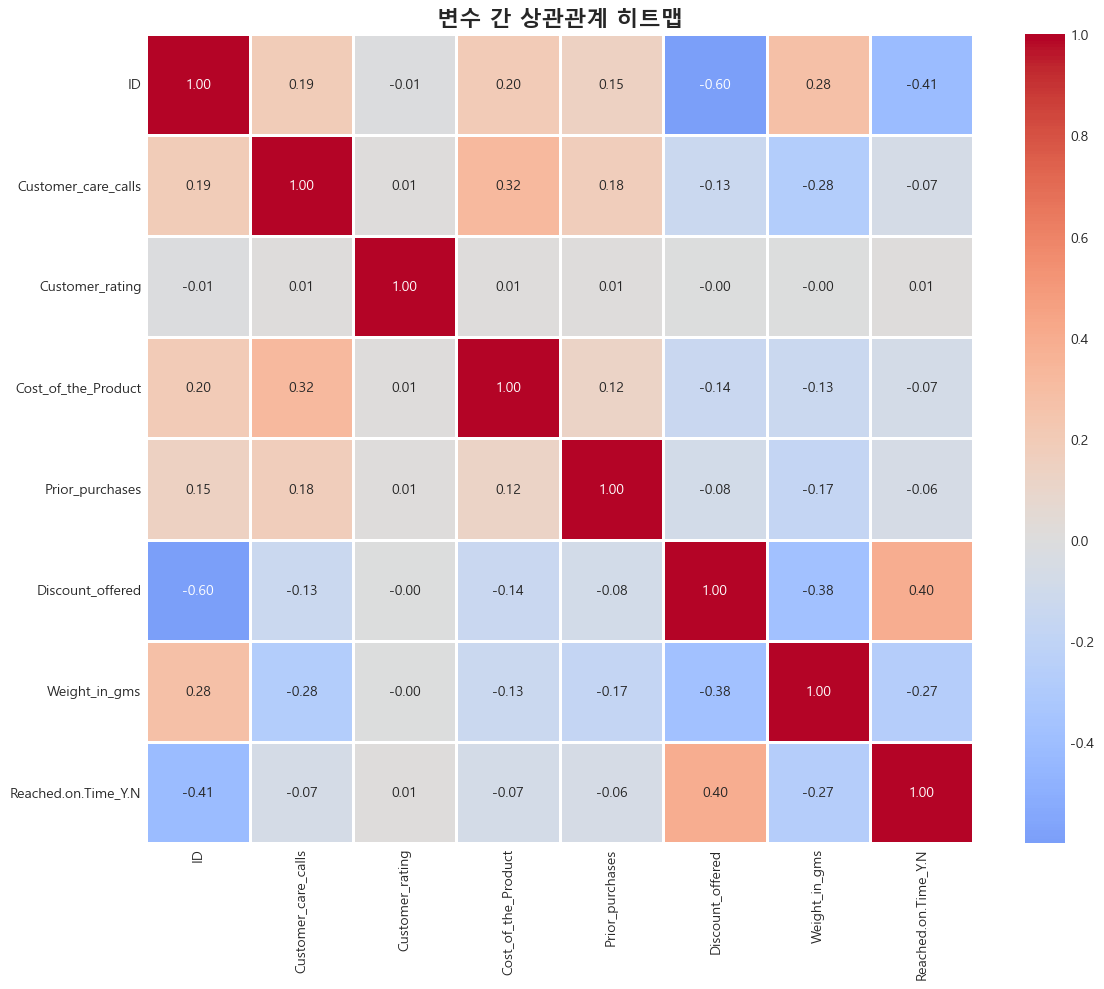


=== 타겟 변수(Reached.on.Time_Y.N)와의 상관관계 ===
Reached.on.Time_Y.N    1.000000
Discount_offered       0.397108
Customer_rating        0.013119
Prior_purchases       -0.055515
Customer_care_calls   -0.067126
Cost_of_the_Product   -0.073587
Weight_in_gms         -0.268793
ID                    -0.411822
Name: Reached.on.Time_Y.N, dtype: float64


In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1)
plt.title('변수 간 상관관계 히트맵', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#타겟 변수와의 상관관계 출력
target_col = 'Reached.on.Time_Y.N'
print(f'\n=== 타겟 변수({target_col})와의 상관관계 ===')
print(correlation_matrix[target_col].sort_values(ascending=False))


2-3. 할인된 가격의 양(Discount_offered) 분석 

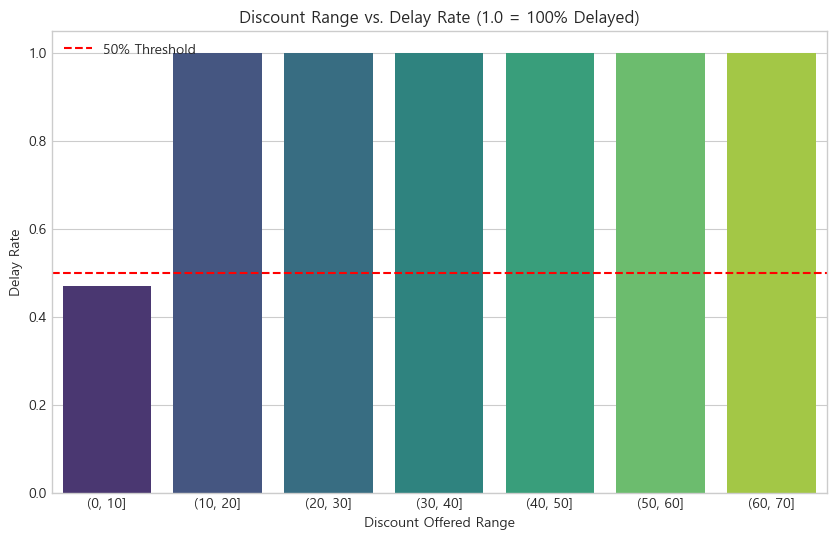

주요 인사이트: 할인율이 10%를 초과하는 구간부터 지연율이 급격히 상승하는지 확인해보세요.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 할인율 구간 생성 (0~10, 10~20, ...)
df['Discount_Range'] = pd.cut(df['Discount_offered'], bins=range(0, 71, 10))

# 2. 구간별 지연율 계산
# Reached.on.Time_Y.N의 평균을 내면 '지연된 비율'이 나옵니다. (1=지연이므로)
discount_analysis = df.groupby('Discount_Range')['Reached.on.Time_Y.N'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount_Range', y='Reached.on.Time_Y.N', data=discount_analysis, palette='viridis')
plt.axhline(0.5, color='red', linestyle='--', label='50% Threshold') # 50% 기준선
plt.title('Discount Range vs. Delay Rate (1.0 = 100% Delayed)')
plt.ylabel('Delay Rate')
plt.xlabel('Discount Offered Range')
plt.legend()
plt.show()

print("주요 인사이트: 할인율이 10%를 초과하는 구간부터 지연율이 급격히 상승하는지 확인해보세요.")

2-3. 창고(warehouse) 및 배송 수단(Mode of shipment)별 지연 현황 분석

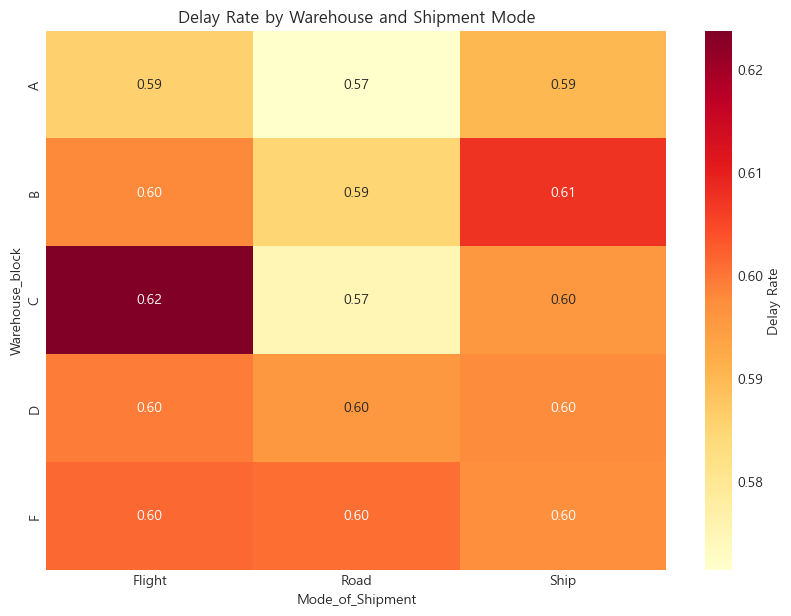

주요 인사이트: 특정 창고(예: F블록)나 특정 수단(예: Ship)에서 유독 지연율이 높은 조합이 있는지 찾아보세요.


In [17]:
# 1. 창고(Warehouse_block)와 배송수단(Mode_of_Shipment)별 지연율 피벗 테이블
pivot_table = df.pivot_table(index='Warehouse_block', 
                             columns='Mode_of_Shipment', 
                             values='Reached.on.Time_Y.N', 
                             aggfunc='mean')

# 2. 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Delay Rate'})
plt.title('Delay Rate by Warehouse and Shipment Mode')
plt.show()

print("주요 인사이트: 특정 창고(예: F블록)나 특정 수단(예: Ship)에서 유독 지연율이 높은 조합이 있는지 찾아보세요.")

### 3. 전처리(preprocessing)

### 4. 특성 엔지니어링(feature engineering)